## 2주차 미션 소개 - EDA를 통한 머신러닝에 영향을 미치는 주요 변수 확인하기

* EDA 를 통해 어떤 피처가 이탈에 영향을 미치는지 확인하고 피처를 변경해서 모델의 성능 개선해 보기
* EDA는 데이터의 구조, 패턴, 이상치, 변수 간 관계 등을 파악하는 데 도움을 줍니다. 모델링 전 데이터에 대한 이해를 가능하게 합니다. 고객 이탈에 영향을 미치는 중요 변수를 식별함으로써, 더 효과적인 피처 선택을 할 수 있습니다. 불필요하거나 적절하지 않은 피처를 제거함으로써, 모델이 특정 데이터에 과적합되는 것을 방지할 수 있습니다. EDA과정은 모델의 복잡성을 줄이고, 성능을 개선하기 위한 피처엔지니어링 전략을 세우는데 중요합니다.

* 미션 데이터셋 소개
    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
df_null = df.isnull()
df_null.sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [ ]:
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
feature_columns = df.columns[:-1].tolist()
feature_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

# 결측치 확인

In [ ]:
cols = feature_columns[:]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [ ]:
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

gender                 0
SeniorCitizen       5901
Partner                0
Dependents             0
tenure                11
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
dtype: int64

* SeniorCitizen, tenure, TotalCharges 열에서 결측값이 있는 것으로 나타남

# 정답값

In [ ]:
#df["Churn"].value_counts()
df["Churn"].value_counts(normalize=True) * 100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

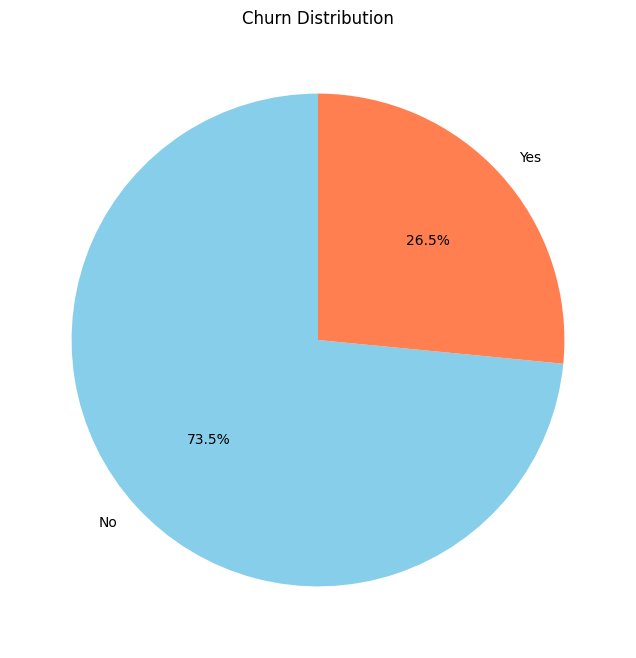

In [ ]:
churn_counts = df['Churn'].value_counts()  # Churn의 개수

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'coral'])  # 소수점 한 자리, 90도에서 시작
plt.title('Churn Distribution')
plt.show()

* 이탈자가 26.5%, 이탈하지 않은 사람이 73.5%

## 미션 1 -  전체 수치 변수를 정답인 이탈 여부로 시각화하고 분석하기
데이터셋의 모든 수치형 변수를 이탈 여부에 따라 시각화하고 수치 구간에 따라 이탈률의 차이에 대해 분석해 주세요.
아래 이미지는 참고용으로 아래 이미지와 똑같이 시각화하지 않아도 됩니다. 이탈 여부를 잘 분석할 수 있는 시각화라면 어떤 시각화든 좋습니다.

<img src="https://i.imgur.com/oCQ9D0l.png">

In [ ]:
# Churn 열의 값을 확인하여 yes이면 1로, no이면 0으로 변환
#df['churn_1'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
#df['churn_0'] = df['Churn'].apply(lambda x: 1 if x == 'No' else 0)

churn_0 = df[df["Churn"] == "No"]
churn_1 = df[df["Churn"] == "Yes"]

In [ ]:
# 타입이 숫자인 column

numeric_columns = df.select_dtypes(include='number').columns
numeric_columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

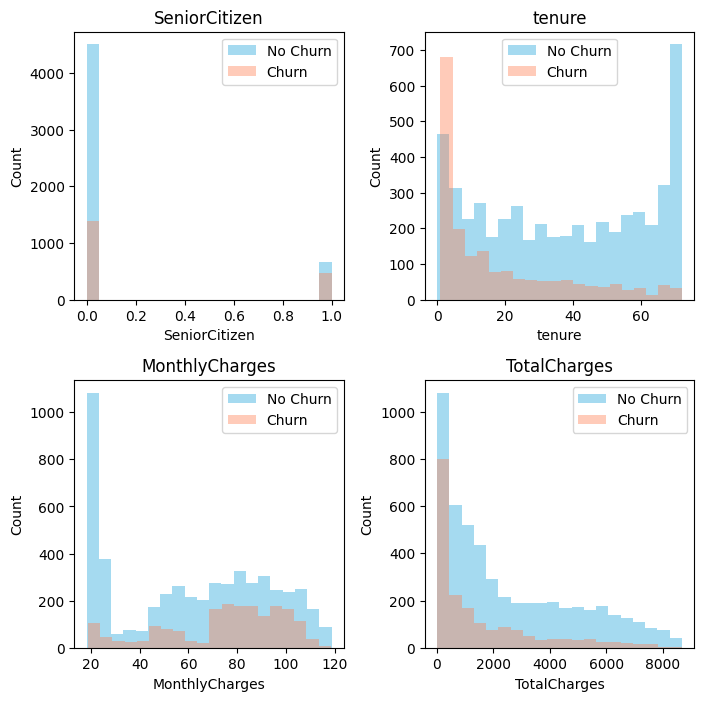

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, column in enumerate(numeric_columns):
    sns.histplot(churn_0[column], bins=20, color='skyblue', label="No Churn", linewidth=0, ax=axes[i])
    sns.histplot(churn_1[column], bins=20, color='coral', alpha=0.4, label="Churn", linewidth=0, ax=axes[i])
    axes[i].legend()  # 범례 표시
    axes[i].set_title(column)
    axes[i].grid(True)  # Add grid

plt.show()

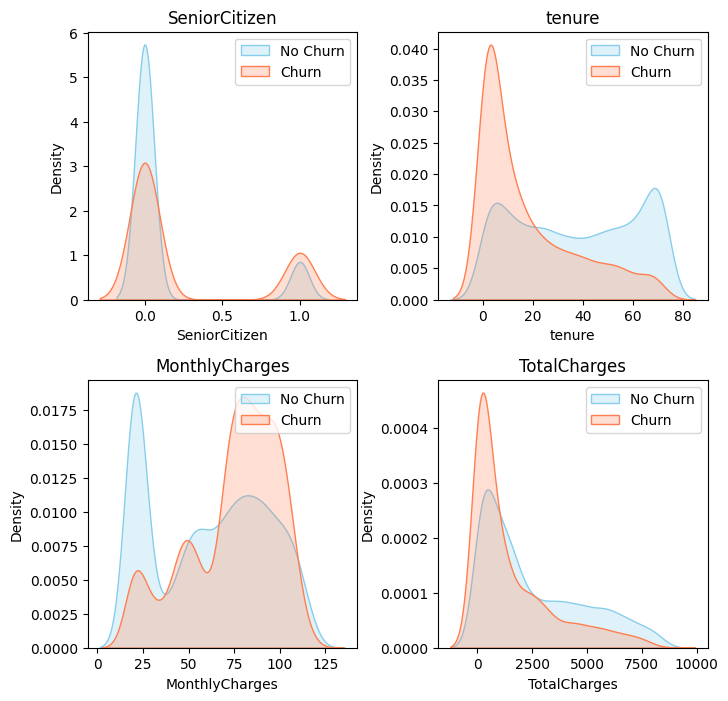

In [ ]:
# KDE로 시각화

fig, axes = plt.subplots(nrows=len(numeric_columns) // 2, ncols=2, figsize=(8, 4 * len(numeric_columns) // 2))
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # 간격 조절

for i, column in enumerate(numeric_columns):
    row, col = i // 2, i % 2  # 행과 열 인덱스 계산
    sns.kdeplot(churn_0[column], color='skyblue', label="No Churn", ax=axes[row, col], fill=True)
    sns.kdeplot(churn_1[column], color='coral', label="Churn", ax=axes[row, col], fill=True)
    axes[row, col].legend()  # 범례 표시
    axes[row, col].set_title(column)

plt.show()

* 고객의 가입 기간이 짧을수록 이탈률이 높음
* 월별 요금을 많이 지불한 고객일수록 이탈률이 높음



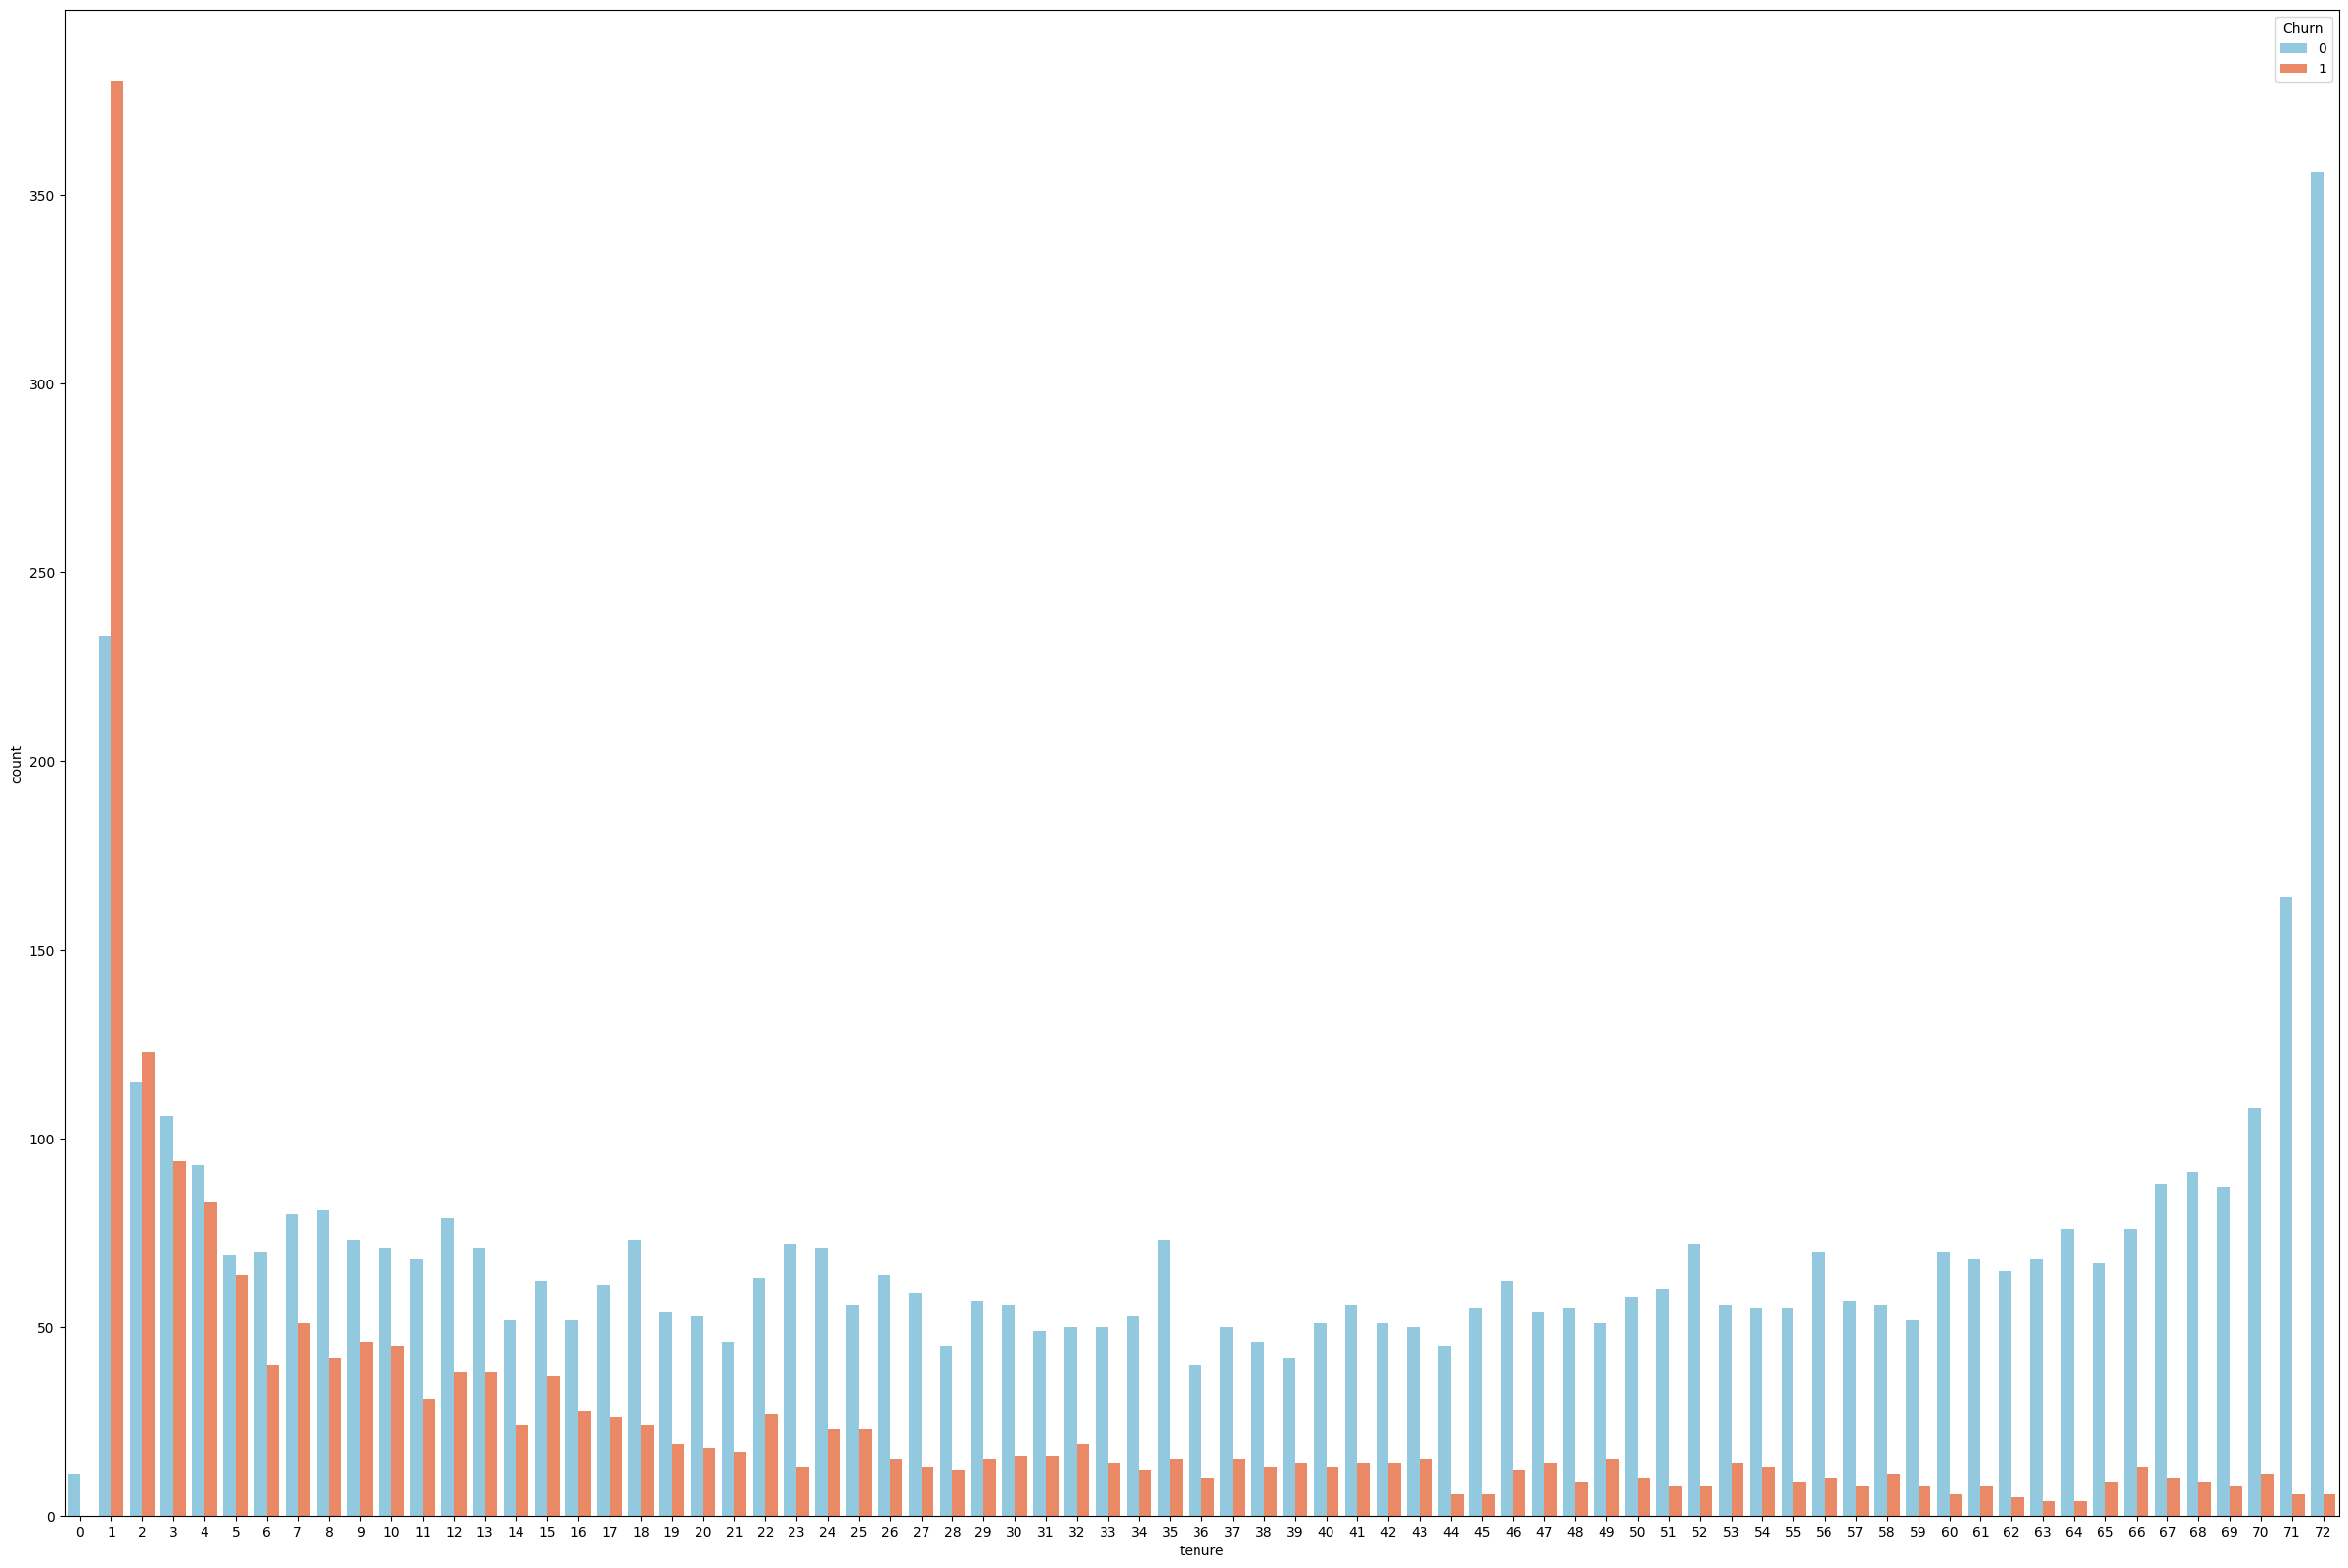

In [ ]:
plt.figure(figsize=(30, 20))
sns.countplot(data=df, x="tenure", hue="Churn")

plt.show()

* 가입 기간이 3개월 미만인 고객은 이탈률이 높게 나타남

In [ ]:
df["tenure_low"] = df["tenure"] < 3
df[["tenure", "tenure_low"]].head()

,tenure,tenure_low
customerID,,
7590-VHVEG,1,True
5575-GNVDE,34,False
3668-QPYBK,2,True
7795-CFOCW,45,False
9237-HQITU,2,True


<Axes: xlabel='tenure_low', ylabel='count'>

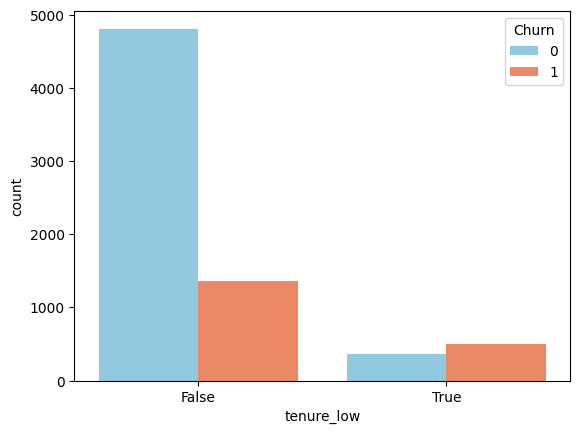

In [ ]:
sns.countplot(data=df, x="tenure_low", hue="Churn", palette = ['skyblue', 'coral'])

In [ ]:
# sns.histplot(df[df['Churn'] == "Yes"]['TotalCharges'].dropna(), bins=50, kde=False, color='skyblue', label='Churn 0', alpha=0.7)

In [ ]:
# plt.figure(figsize=(8, 5))
# sns.histplot(df[df['Churn'] == "Yes"]['TotalCharges'], bins=20, kde=False, color='skyblue', label='Churn 0')
# sns.histplot(df[df['Churn'] == "No"]['TotalCharges'], bins=20, kde=False, color='orange', label='Churn 1', alpha=0.4)

## 미션 2 - 주요 범주형 변수와 정답 값 비교하기

* 범주형 변수가 타겟 변수에 어떤 영향을 미치는지 이해함으로써, 해당 변수의 중요성을 파악할 수 있습니다. 이는 피처 선택 과정에서 중요한 지표가 됩니다. 범주형 변수와 정답 값 간의 관계를 분석함으로써 비즈니스 의사결정, 데이터 전략 수립, 모델 설계에 활용할 수 있습니다. 범주형 변수가 타겟 변수와 강한 관계를 보일 경우, 이는 모델의 예측 성능을 향상시킬 수 있는 중요한 피처임을 알아볼 수 있습니다. 범주형 변수와 정답 값 간의 비교를 통해 예상치 못한 패턴이나 이상치를 발견할 수 있습니다. 이는 데이터 전처리 과정에서 문제점을 해결하고 데이터의 품질을 개선하는 데 도움이 됩니다.
* 주요 범주형 변수와 타겟값인 이탈여부를 분석하는 시각화를 진행하고 그 과정에서 알게된 점을 정리해 주세요.

<img src="https://i.imgur.com/Q1KpQpP.png" width="500">

In [ ]:
nunique = df.nunique()  # 각 열의 고유한 값의 개수
category_col = nunique[nunique < 5]  # 고유값의 개수가 5 미만
category_col

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

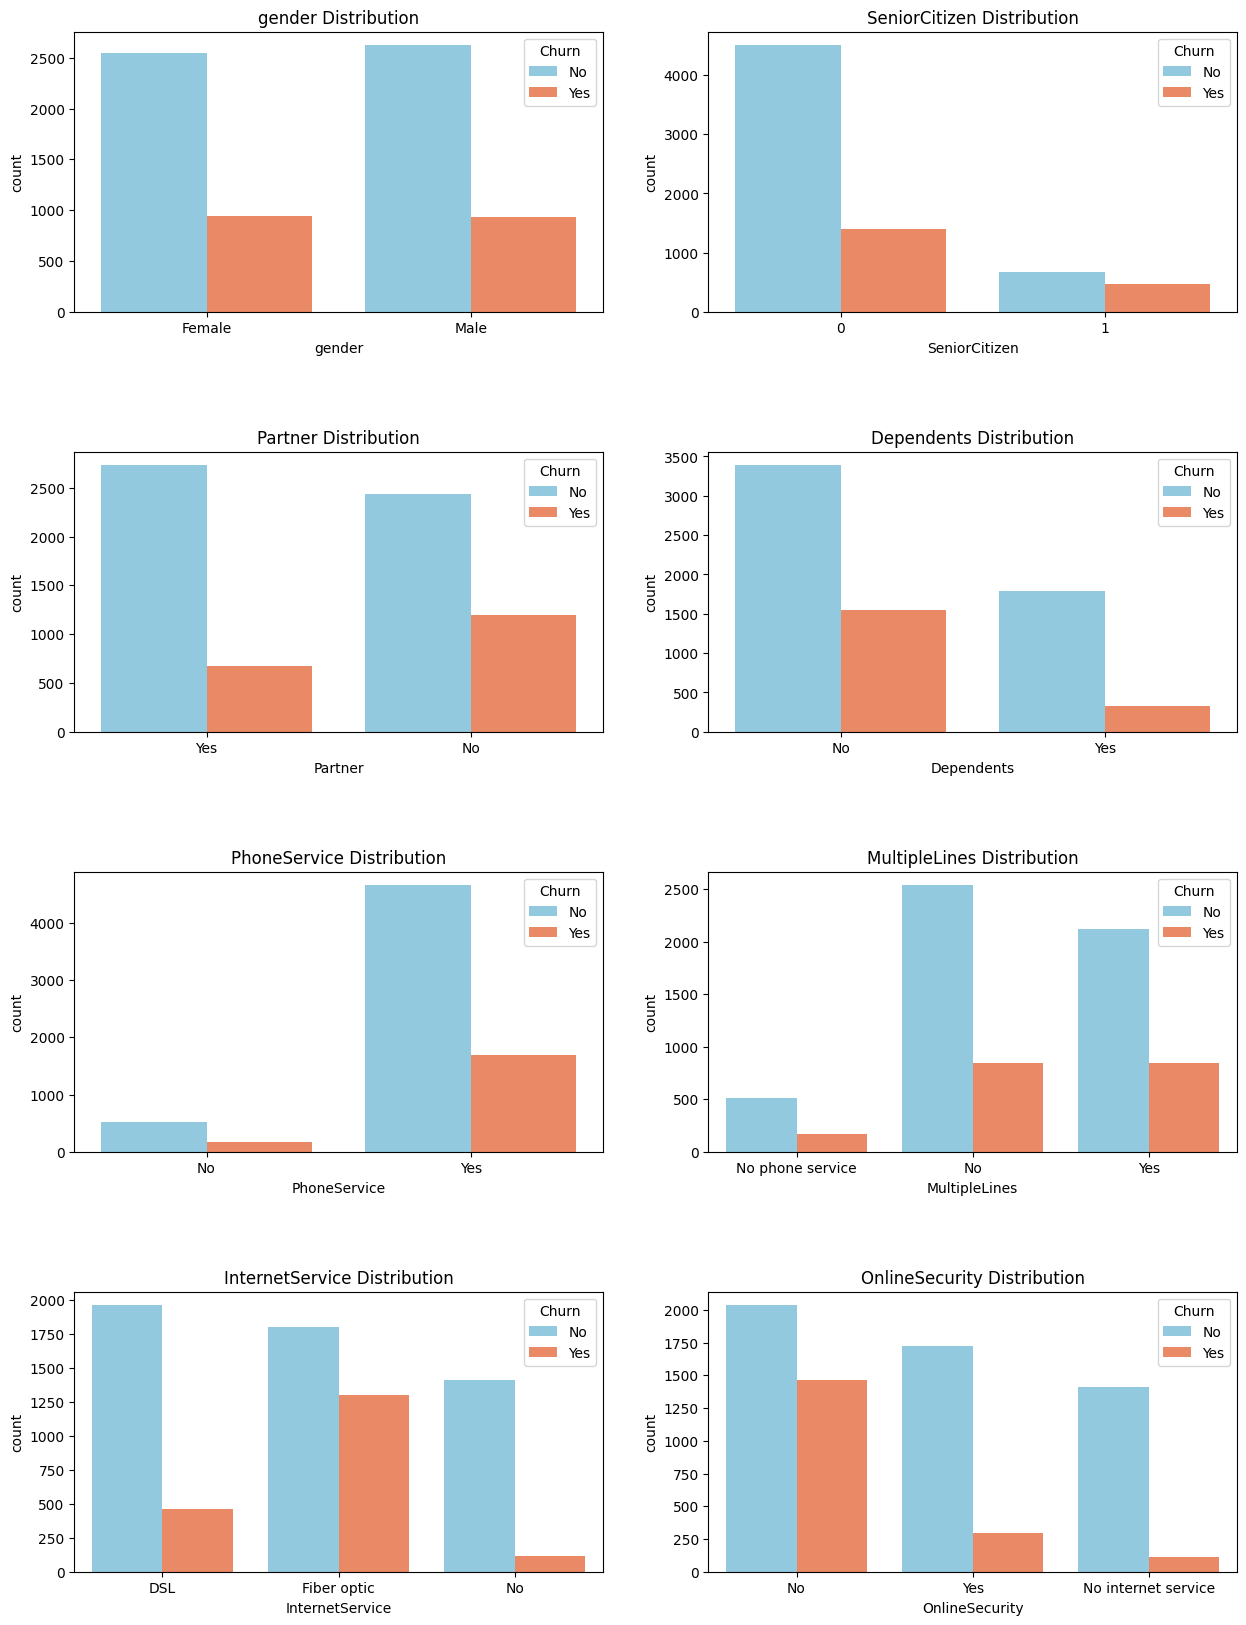

In [ ]:
# 다음의 코드를 실행하면 범주형 변수를 볼 수 있습니다.
# 위 예시처럼 시각화를 여기에 구현해 주세요.
category_col_name = category_col.index.tolist()

num_categories = len(category_col_name)
num_rows = 4
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i in range(num_rows * num_cols):
      col = category_col_name[i]
      sns.countplot(x=col, data=df, hue='Churn', ax=axes[i // num_cols, i % num_cols], palette = ['skyblue', 'coral'])
      axes[i // num_cols, i % num_cols].set_title(f'{col} Distribution')  # 그래프 제목

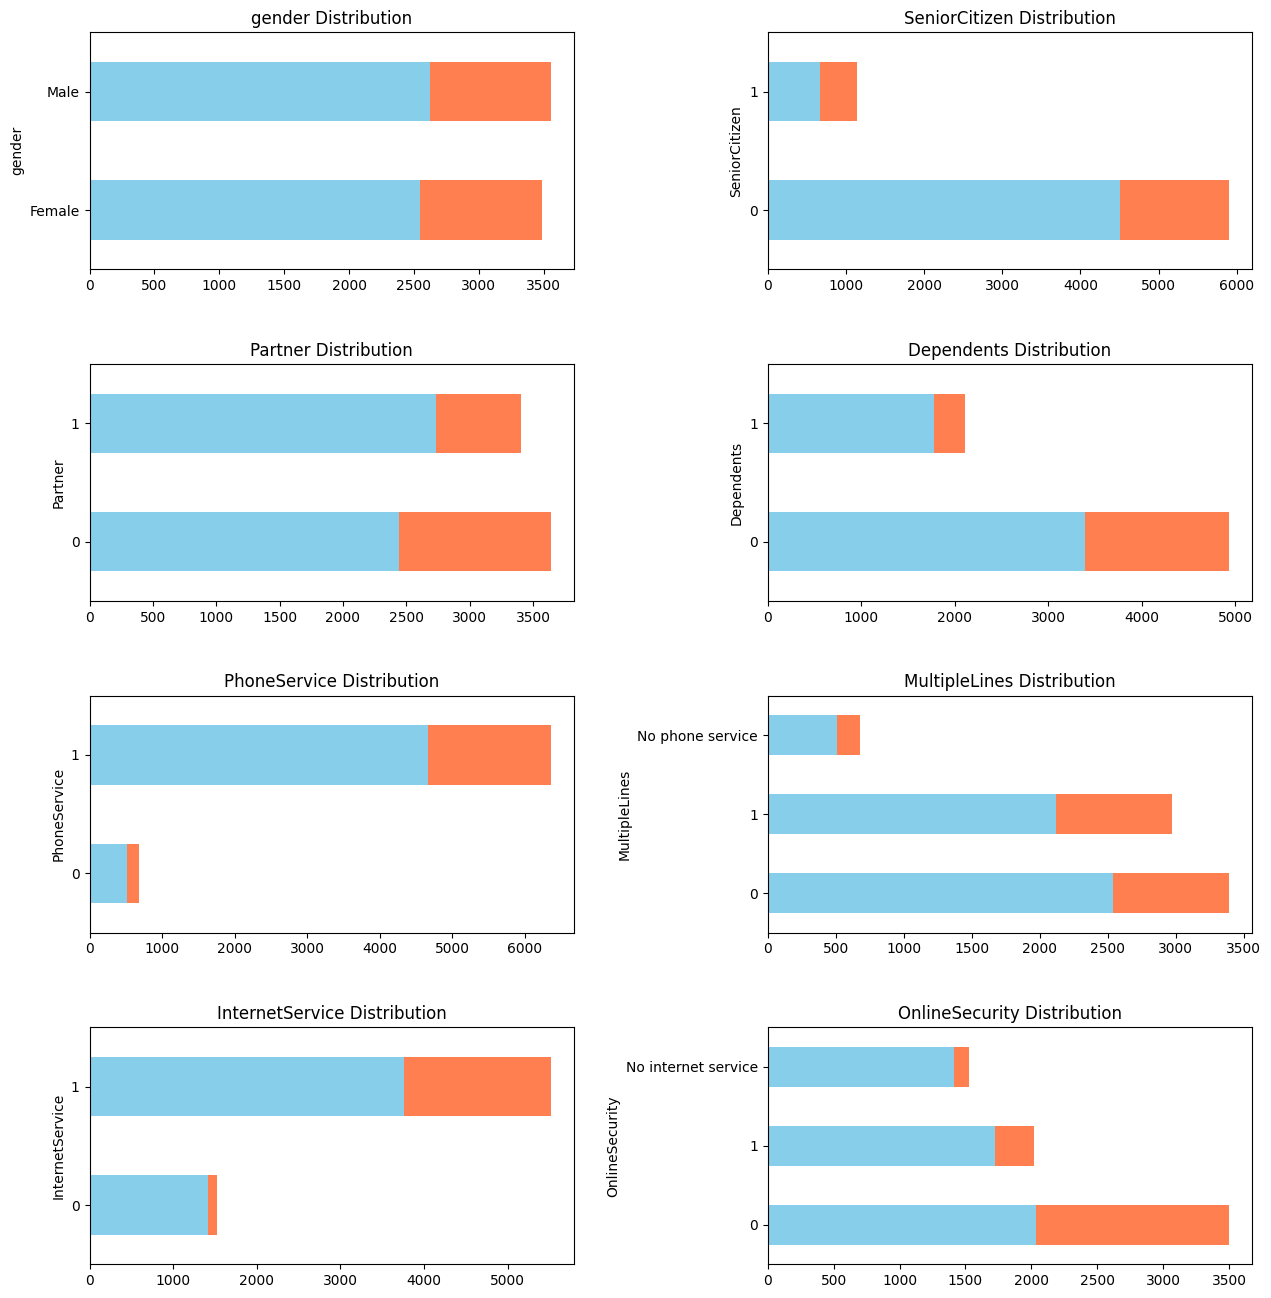

In [ ]:
# Stacked Bar Chart로 시각화

category_col_name = category_col.index.tolist()

num_categories = len(category_col_name)
num_rows = 4
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(num_rows * num_cols):
    col = category_col_name[i]
    crosstab_data = pd.crosstab(df[col], df['Churn'])
    ax = crosstab_data.plot(kind='barh', stacked=True, ax=axes[i // num_cols, i % num_cols], color=['skyblue', 'coral'])
    ax.legend().set_visible(False)

    ax.set_title(f'{col} Distribution')

* 성별에 따른 이탈 여부 차이는 없음
* 젊은 고객의 이탈률이 더 높음
* 배우자가 있는 고객보다 없는 고객의 이탈률이 더 높음
* 자녀가 없는 고객의 이탈률이 더 높음
* 전화 서비스를 이용하는 고객의 이탈률이 높게 나타냄
* 광섬유 인터넷 서비스를 사용하는 고객은 DSL과 No에 비해 이탈률이 더 높음
* 온라인 보안 서비스를 가입하지 않은 고객의 이탈률이 높게 나타남


## 미션 3 - 수치변수 간의 관계를 파악하기 위해 그래프를 시각화 하고 상관계수를 구해주세요.


상관계수를 통해 변수들 간의 선형적 관계를 파악합니다. 높은 상관관계를 보이는 변수들을 식별하여, 중복되거나 불필요한 특징을 제거함으로써 모델의 성능을 최적화할 수 있습니다. 강한 상관관계를 가진 변수들을 식별하여, 다중공선성 문제를 방지합니다. 상관 행렬을 시각화하여 데이터의 패턴과 특성을 더 잘 이해하고, 피처엔지니어링에 어떻게 활용할지 시각화 결과를 해석해 보세요. 또, 아래 예시와 똑같이 구해도 되지만 다른 변수를 추가하거나 여러분만의 인사이트를 추가해서 구해도 좋습니다.


|                |   SeniorCitizen |    tenure |   MonthlyCharges |
|:---------------|----------------:|----------:|-----------------:|
| SeniorCitizen  |       1         | 0.0165669 |         0.220173 |
| tenure         |       0.0165669 | 1         |         0.2479   |
| MonthlyCharges |       0.220173  | 0.2479    |         1        |




<table>
    <tr>
        <td><img src="https://i.imgur.com/RTfJDJN.png" width="300"></td>
        <td><img src="https://i.imgur.com/41Y04lj.png" width="300"></td>
    </tr>
</table>

In [ ]:
df_matrix = df.iloc[:,:].replace(0, np.nan)  # MonthlyCharges까지 가져옴, 0 값을 결측치로 만들어줌
df_matrix["Churn"] = df["Churn"]
df_matrix.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,NaN,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_corr = df.corr()
df_corr.style.background_gradient()

<ipython-input-24-7ec518fa3244>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [ ]:
df_matrix = df.iloc[:,:].replace(0, np.nan)  # 0 값을 결측치로 만들어줌
df_matrix["Churn"] = df["Churn"]
df_matrix.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,NaN,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: >

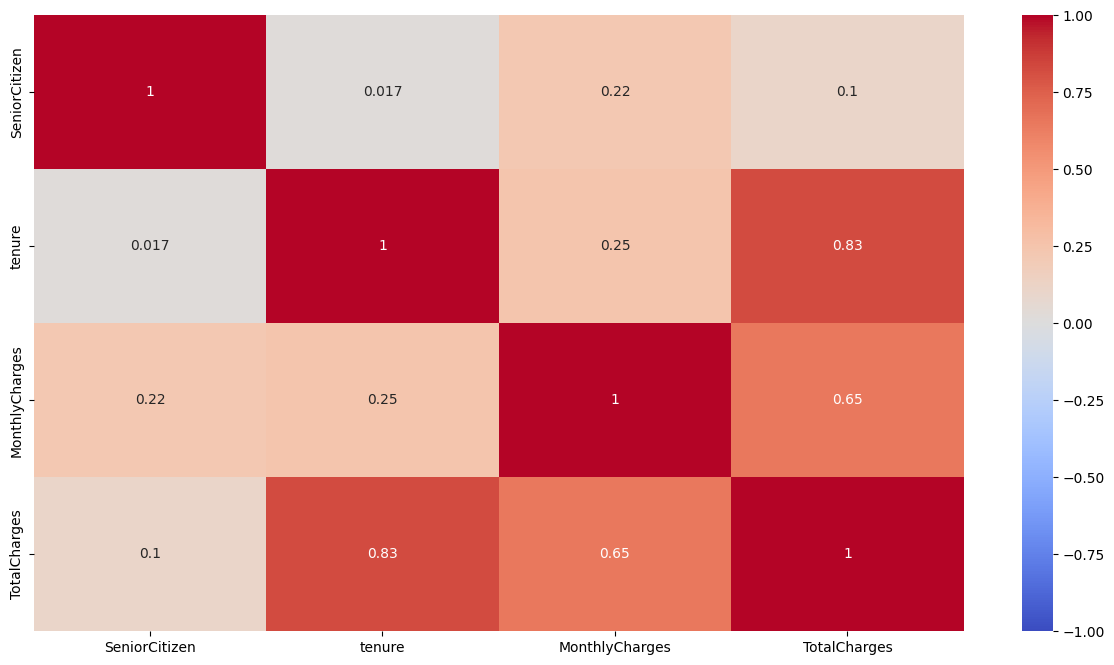

In [ ]:
# 여기에 상관계수를 구하고 heatmap 으로 시각화 해주세요.
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

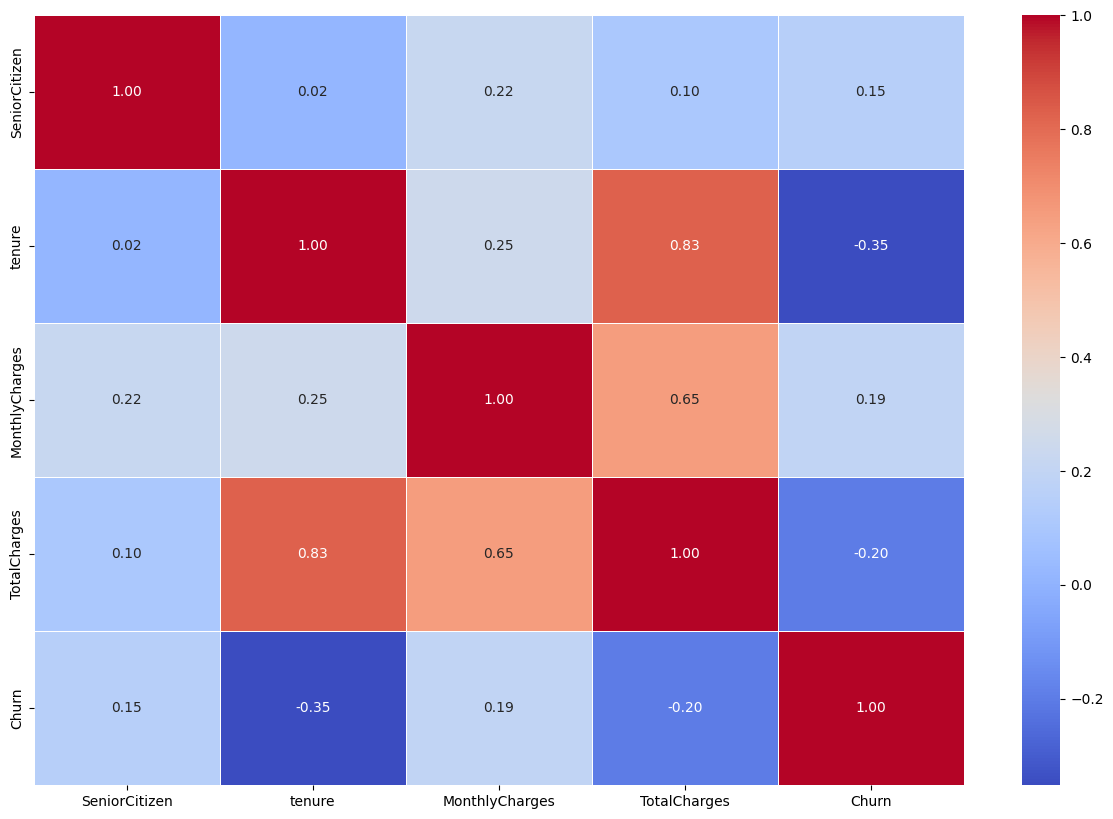

In [ ]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

numeric_columns = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

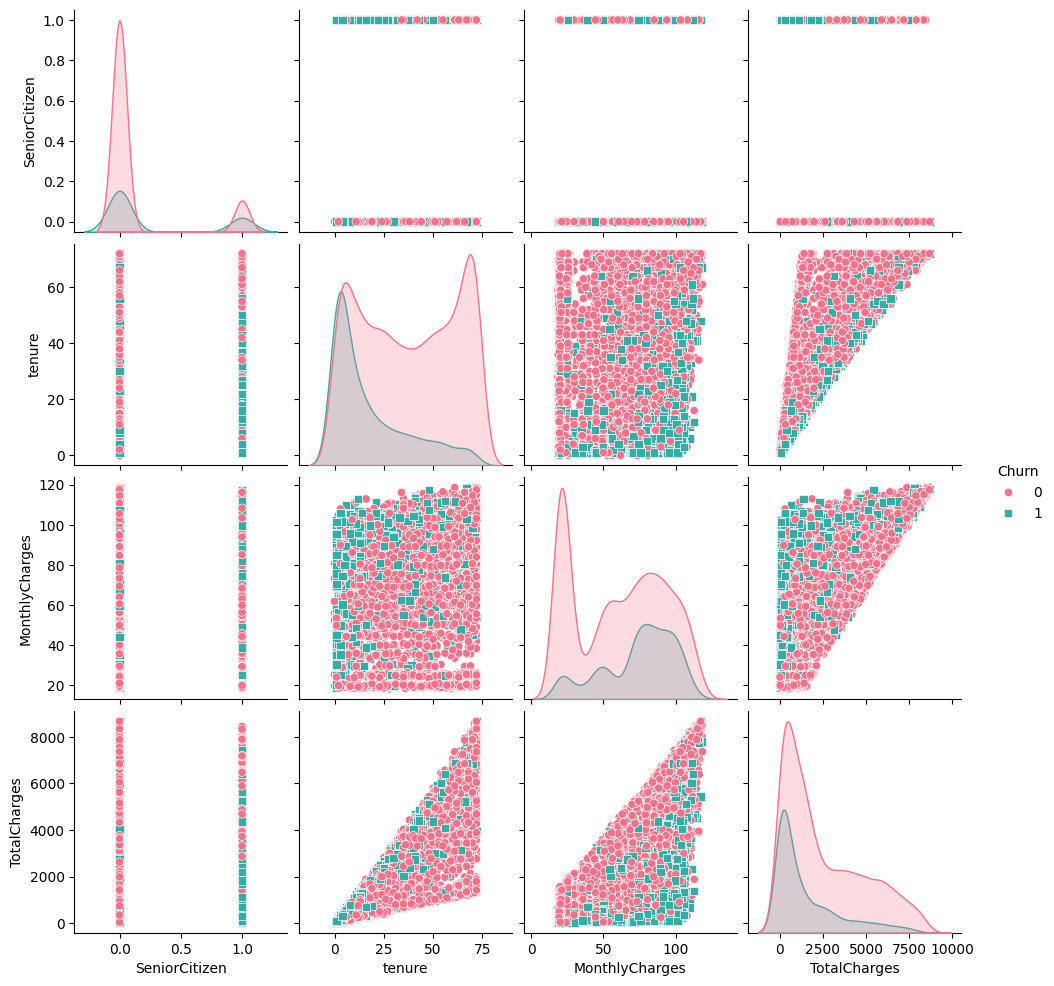

In [ ]:
# seaborn 의 pairplot 으로 이탈여부(Churn)에 따라 시각화 해주세요.
sns.pairplot(df, hue='Churn', palette='husl', markers=['o', 's'])
plt.show()

# 서비스별 상관관계

In [ ]:
# df['InternetService'] = df['InternetService'].map({'DSL': 1, 'Fiber optic': 1, 'No': 0})

# # Other columns mapping
# df.replace({'Yes': 1, 'No': 0}, inplace=True)

# # Selecting the desired columns
# selected_columns = [
#     'InternetService',
#     'OnlineSecurity',
#     'OnlineBackup',
#     'DeviceProtection',
#     'TechSupport',
#     'StreamingTV',
#     'StreamingMovies'
# ]

# new_df = df[selected_columns]

# # Results checking
# print(new_df)

            InternetService OnlineSecurity OnlineBackup DeviceProtection  \
customerID                                                                 
7590-VHVEG                1              0            1                0   
5575-GNVDE                1              1            0                1   
3668-QPYBK                1              1            1                0   
7795-CFOCW                1              1            0                1   
9237-HQITU                1              0            0                0   
...                     ...            ...          ...              ...   
6840-RESVB                1              1            0                1   
2234-XADUH                1              0            1                1   
4801-JZAZL                1              1            0                0   
8361-LTMKD                1              0            0                0   
3186-AJIEK                1              1            0                1   

           